## NBA vs WNBA Exploratory Analysis

In [33]:
import pandas as pd

path = r'C:\Users\allie\Documents\cs5010\NBAvsWNBA.csv' # use your path
#path = '/Users/juliecrowe/Documents/UVA Classes/CS 5010/NBAvsWNBA.csv'

df= pd.read_csv(path)  
df.sort_values('salary_float')
#df.dtypes

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,PF,PTS,League,Team,Position,Age,Avg_Salary,salary_float,salary_ratio,Salary_Rank
160,Megan Walker,18,0,205.0,1.4,4.3,0.321,0.3,2.4,0.140,...,0.8,3.3,WNBA,PHX,F,22,"$65,459",65459,0.00109,161
159,Jocelyn Willoughby,22,5,383.0,1.8,5.0,0.358,0.7,1.7,0.405,...,2.3,5.8,WNBA,NY,F,23,"$65,459",65459,0.00109,160
158,Jazmine Jones,20,2,428.0,3.5,8.6,0.404,0.8,2.3,0.333,...,3.0,10.8,WNBA,NY,G,24,"$65,459",65459,0.00109,159
154,Bella Alarie,22,3,309.0,1.1,3.0,0.364,0.0,0.6,0.077,...,1.6,2.7,WNBA,DAL,G,22,"$68,339",68339,0.00114,155
157,Ruthy Hebard,22,6,320.0,2.6,3.9,0.682,0.0,0.0,NaN,...,1.6,5.7,WNBA,CHI,F,22,"$68,339",68339,0.00114,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Stephen Curry,51,51,34.1,10.2,21.0,0.486,5.1,12.1,0.425,...,1.8,31.1,NBA,GSW,G,32,"$40,231,758",40231758,0.00544,5
3,Kevin Durant,24,22,32.7,9.3,17.1,0.543,2.5,5.5,0.462,...,2.0,27.3,NBA,BKN,F,32,"$41,063,925",41063925,0.00555,4
2,Russell Westbrook,51,51,35.6,8.2,18.9,0.436,1.3,4.1,0.310,...,2.8,21.6,NBA,WAS,G,31,"$41,358,814",41358814,0.00559,3
1,James Harden,42,42,37.1,8.0,17.2,0.463,2.8,7.8,0.358,...,2.3,25.2,NBA,BKN,G,31,"$42,782,880",42782880,0.00578,2


### Important Constant values we may want to refer to:

**NBA Salary Cap = $109,140,000** <br>
**WNBA Salary Cap = $1,300,000** <br>
**NBA Revenue = $7,400,000,000** <br>
**WNBA Revenue = $60,000,000**

In [75]:
nba_salary_cap = float(109140000)
wnba_salary_cap = float(1300000)
nba_revenue = float(7400000000)
wnba_revenue = float(60000000)

### Views of Salaries vs League

In [4]:
import plotly.express as px

fig = px.scatter(df, x= "Salary_Rank", y="salary_float", color="League", facet_row="League", hover_data=['Avg_Salary'])
fig.update_yaxes(matches=None)

fig.show()

In [77]:
fig = px.box(df, x="League", y="salary_float", color="League", facet_row="League", points="all")
fig.update_yaxes(matches=None)
fig.show()

### Views of Salary Ratios vs League

Salary Ratios compare player's salaries to the League's revenue. <br>
Diving all of the salaries by respective revenues scales the data to comparable values for more useful insights

In [78]:
fig = px.scatter(df, x= "Salary_Rank", y="salary_ratio", color="League", hover_data=['Avg_Salary'])
fig.show()

In [79]:
fig = px.box(df, x="League", y="salary_ratio", color="League", points="all")
fig.show()

In [3]:
fig = px.box(df, x= "Position", y="FG%", color="League", hover_data=['Avg_Salary', 'salary_ratio'], points="all")

fig.show()

In [6]:
import plotly.express as px
fig = px.scatter_matrix(df, dimensions=["salary_ratio", "FG%", "3P%", "GS"], color="League")
fig.show()


Correlation Matrix

                     G        GS        MP        FG       FGA       FG%  \
G             1.000000  0.794922 -0.615540  0.494317  0.489296  0.182514   
GS            0.794922  1.000000 -0.442141  0.642831  0.624011  0.276019   
MP           -0.615540 -0.442141  1.000000 -0.260546 -0.263152 -0.029005   
FG            0.494317  0.642831 -0.260546  1.000000  0.970489  0.400104   
FGA           0.489296  0.624011 -0.263152  0.970489  1.000000  0.196191   
FG%           0.182514  0.276019 -0.029005  0.400104  0.196191  1.000000   
3P            0.443419  0.437676 -0.337024  0.545452  0.629934 -0.096873   
3PA           0.443087  0.435063 -0.340760  0.552335  0.665443 -0.194837   
3P%           0.027674  0.037492 -0.011742  0.094008  0.071529  0.143393   
2P            0.366049  0.542537 -0.144251  0.911374  0.835266  0.516636   
2PA           0.340727  0.523810 -0.112258  0.898518  0.859878  0.390396   
2P%           0.268992  0.299223 -0.101092  0.396860  0.241208  0.789461   
FT          

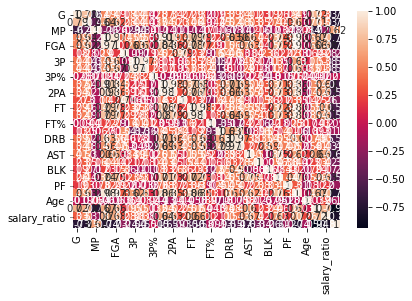

In [45]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
print(corrMatrix)

sn.heatmap(corrMatrix, annot=True)
plt.show()~